In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
num = pd.read_csv("teaching_training_data_num.csv")
all = pd.read_csv("teaching_training_data.csv")

,Unnamed: 0,unid,num_score
0,1,68158,6
1,2,68536,3
2,3,33026,2
3,4,33026,2
4,5,33026,2


In [40]:
new = all.merge(num, how = "left", on = ["unid"]) #on "unid" to match the people with their corresponding scores
new.head(100)

,Unnamed: 0_x,unid,survey_date_month,survey_num,gender,dob,province,working,job_start_date,job_leave_date,...,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,Unnamed: 0_y,num_score
0,1,41964,2018-06-01,1,Female,1992-02-01,NaN,True,2018-06-01,NaN,...,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,1992-02-01,NaN,True,2018-04-30,2018-11-08,...,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,1988-11-01,NaN,True,2015-03-01,2016-03-15,...,NaN,3,1,True,True,2,8,False,NaN,NaN
3,4,33702,2016-04-01,1,Male,1991-04-01,NaN,True,2016-02-01,2016-04-14,...,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN
4,5,33702,2016-08-01,2,Male,1991-04-01,NaN,False,NaN,NaN,...,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,35670,2017-06-01,4,Male,1991-06-01,Gauteng,False,2017-03-01,2017-05-01,...,NaN,0,1,True,True,4,8,False,15.0,3.0
96,52,35670,2017-06-01,4,Male,1991-06-01,Gauteng,False,2017-03-01,2017-05-01,...,NaN,0,1,True,True,4,8,False,16.0,3.0
97,52,35670,2017-06-01,4,Male,1991-06-01,Gauteng,False,2017-03-01,2017-05-01,...,NaN,0,1,True,True,4,8,False,17.0,3.0
98,53,35670,2017-10-01,5,Male,1991-06-01,Gauteng,False,NaN,NaN,...,NaN,0,1,True,True,4,8,False,12.0,3.0


In [41]:
new["job_start_date"]=pd.to_datetime(new["job_start_date"])
new["job_leave_date"]=pd.to_datetime(new["job_leave_date"])

In [42]:
drop_c = ["survey_date_month", "survey_num", "dob", "province", "peoplelive", "peoplelive_15plus"]
new = new.drop(drop_c, axis = 1)
new.head

<bound method NDFrame.head of         Unnamed: 0_x   unid  gender  working job_start_date job_leave_date  \
0                  1  41964  Female     True     2018-06-01            NaT   
1                  2  41964  Female     True     2018-04-30     2018-11-08   
2                  3  15241  Female     True     2015-03-01     2016-03-15   
3                  4  33702    Male     True     2016-02-01     2016-04-14   
4                  5  33702    Male    False            NaT            NaT   
...              ...    ...     ...      ...            ...            ...   
120095         83269  79971  Female     True     2016-12-01     2017-04-13   
120096         83269  79971  Female     True     2016-12-01     2017-04-13   
120097         83270  79971  Female     True     2016-11-01     2017-08-11   
120098         83270  79971  Female     True     2016-11-01     2017-08-11   
120099         83270  79971  Female     True     2016-11-01     2017-08-11   

                   company_size  

In [43]:
new.describe()

,Unnamed: 0_x,unid,Unnamed: 0_y,num_score
count,120100.000000,120100.000000,58329.000000,58329.000000
mean,41536.007344,50246.674263,10710.725557,3.621372
std,24024.720204,28511.086110,6203.210462,1.408900
min,1.000000,2.000000,1.000000,1.000000
25%,20655.750000,25696.000000,5318.000000,3.000000
50%,41592.500000,50018.000000,10729.000000,4.000000
75%,62362.000000,74125.750000,16064.000000,4.000000
max,83270.000000,102524.000000,21497.000000,10.000000


In [44]:
new['duration'] = new['job_leave_date'] - new['job_start_date']

In [45]:
new.head()

,Unnamed: 0_x,unid,gender,working,job_start_date,job_leave_date,company_size,monthly_pay,volunteer,leadershiprole,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,Unnamed: 0_y,num_score,duration
0,1,41964,Female,True,2018-06-01,NaT,More than 200 employees,Between R2001 and 3000,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaT
1,2,41964,Female,True,2018-04-30,2018-11-08,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,192 days
2,3,15241,Female,True,2015-03-01,2016-03-15,NaN,NaN,No,No,3,1,True,True,2,8,False,NaN,NaN,380 days
3,4,33702,Male,True,2016-02-01,2016-04-14,NaN,NaN,Yes,No,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,73 days
4,5,33702,Male,False,NaT,NaT,NaN,NaN,Yes,No,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,NaT


,Unnamed: 0_x,unid,working,Unnamed: 0_y,num_score,duration,financial_situation
Unnamed: 0_x,1.000000,0.010097,-0.008026,0.999980,0.015277,-0.004257,-0.005389
unid,0.010097,1.000000,-0.029428,0.020337,0.052017,-0.123580,0.015014
working,-0.008026,-0.029428,1.000000,-0.011868,0.070027,0.169494,0.030814
Unnamed: 0_y,0.999980,0.020337,-0.011868,1.000000,0.015156,-0.015453,-0.005895
num_score,0.015277,0.052017,0.070027,0.015156,1.000000,-0.026137,0.028731
duration,-0.004257,-0.123580,0.169494,-0.015453,-0.026137,1.000000,0.012622
financial_situation,-0.005389,0.015014,0.030814,-0.005895,0.028731,0.012622,1.000000


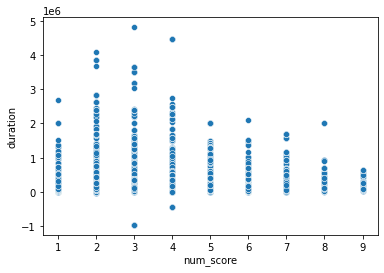

In [79]:
ax = sns.scatterplot(x="num_score", y="duration", data=new)


In [50]:
new.dtypes

Unnamed: 0_x                            int64
unid                                    int64
gender                                 object
working                                  bool
job_start_date                 datetime64[ns]
job_leave_date                 datetime64[ns]
company_size                           object
monthly_pay                            object
volunteer                              object
leadershiprole                         object
numchildren                            object
numearnincome                          object
anygrant                               object
anyhhincome                            object
financial_situation_now                object
financial_situation_5years             object
givemoney_yes                          object
Unnamed: 0_y                          float64
num_score                             float64
duration                      timedelta64[ns]
dtype: object

In [51]:
new['duration'] = new.duration.astype('timedelta64[s]').div(60)

In [52]:
new.dtypes

Unnamed: 0_x                           int64
unid                                   int64
gender                                object
working                                 bool
job_start_date                datetime64[ns]
job_leave_date                datetime64[ns]
company_size                          object
monthly_pay                           object
volunteer                             object
leadershiprole                        object
numchildren                           object
numearnincome                         object
anygrant                              object
anyhhincome                           object
financial_situation_now               object
financial_situation_5years            object
givemoney_yes                         object
Unnamed: 0_y                         float64
num_score                            float64
duration                             float64
dtype: object

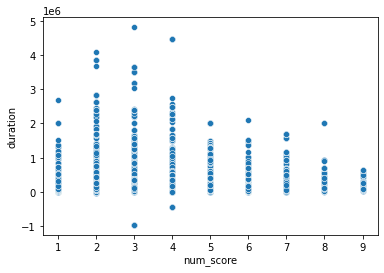

In [53]:
ax = sns.scatterplot(x="num_score", y="duration", data=new)

In [54]:
new.head()

,Unnamed: 0_x,unid,gender,working,job_start_date,job_leave_date,company_size,monthly_pay,volunteer,leadershiprole,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,Unnamed: 0_y,num_score,duration
0,1,41964,Female,True,2018-06-01,NaT,More than 200 employees,Between R2001 and 3000,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2,41964,Female,True,2018-04-30,2018-11-08,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,276480.0
2,3,15241,Female,True,2015-03-01,2016-03-15,NaN,NaN,No,No,3,1,True,True,2,8,False,NaN,NaN,547200.0
3,4,33702,Male,True,2016-02-01,2016-04-14,NaN,NaN,Yes,No,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,105120.0
4,5,33702,Male,False,NaT,NaT,NaN,NaN,Yes,No,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,NaN


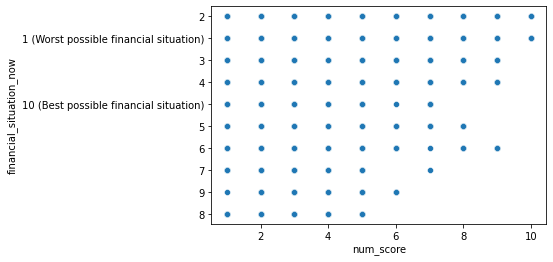

In [55]:
ax = sns.scatterplot(x="num_score", y="financial_situation_now", data=new) #finsit is an object, need to convert

In [68]:
new['financial_situation'] = new['financial_situation_now'].str[:1]
new.head()

,Unnamed: 0_x,unid,gender,working,job_start_date,job_leave_date,company_size,monthly_pay,volunteer,leadershiprole,...,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,Unnamed: 0_y,num_score,duration,financial_situation
0,1,41964,Female,True,2018-06-01,NaT,More than 200 employees,Between R2001 and 3000,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,41964,Female,True,2018-04-30,2018-11-08,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,276480.0,NaN
2,3,15241,Female,True,2015-03-01,2016-03-15,NaN,NaN,No,No,...,1,True,True,2,8,False,NaN,NaN,547200.0,2
3,4,33702,Male,True,2016-02-01,2016-04-14,NaN,NaN,Yes,No,...,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,105120.0,1
4,5,33702,Male,False,NaT,NaT,NaN,NaN,Yes,No,...,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,NaN,NaN,NaN,1


In [71]:
new['financial_situation'] = new.financial_situation.astype('float')

In [72]:
new.dtypes

Unnamed: 0_x                           int64
unid                                   int64
gender                                object
working                                 bool
job_start_date                datetime64[ns]
job_leave_date                datetime64[ns]
company_size                          object
monthly_pay                           object
volunteer                             object
leadershiprole                        object
numchildren                           object
numearnincome                         object
anygrant                              object
anyhhincome                           object
financial_situation_now               object
financial_situation_5years            object
givemoney_yes                         object
Unnamed: 0_y                         float64
num_score                            float64
duration                             float64
financial_situation                  float64
dtype: object

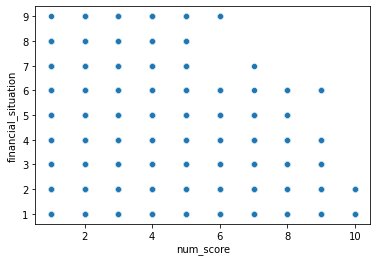

In [73]:
ax = sns.scatterplot(x="num_score", y="financial_situation", data=new)
#Remember to calculate the correlation coefficient for financial situation and duration


In [80]:
new.corr()
#The correlation coefficient, r, between duration and and num_score is -0.02. Very close to 0, implies that there is
#practically no correlation between the two quantitative variables. Same situation applies to financial situation.


,Unnamed: 0_x,unid,working,Unnamed: 0_y,num_score,duration,financial_situation
Unnamed: 0_x,1.000000,0.010097,-0.008026,0.999980,0.015277,-0.004257,-0.005389
unid,0.010097,1.000000,-0.029428,0.020337,0.052017,-0.123580,0.015014
working,-0.008026,-0.029428,1.000000,-0.011868,0.070027,0.169494,0.030814
Unnamed: 0_y,0.999980,0.020337,-0.011868,1.000000,0.015156,-0.015453,-0.005895
num_score,0.015277,0.052017,0.070027,0.015156,1.000000,-0.026137,0.028731
duration,-0.004257,-0.123580,0.169494,-0.015453,-0.026137,1.000000,0.012622
financial_situation,-0.005389,0.015014,0.030814,-0.005895,0.028731,0.012622,1.000000


<AxesSubplot:>

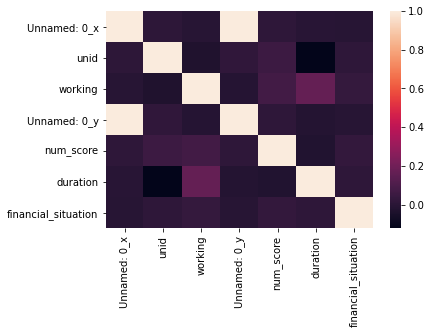

In [82]:
sns.heatmap(new.corr())

In [ ]:
########################################Look at these issues in terms of gender now##############################

In [105]:
men_num = new[new.gender=="Male"].num_score
women_num = new[new.gender=="Female"].num_score

In [106]:
men_num.describe()

count    22957.000000
mean         3.997866
std          1.484498
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: num_score, dtype: float64

In [107]:
women_num.describe()

count    35372.000000
mean         3.377021
std          1.300533
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: num_score, dtype: float64

In [ ]:
#Null hyp: There is no significant difference in the numercial scores between males and females that would provide
#further insight into youth unemployment.

from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

men_num = men_num.dropna()
women_num = women_num.dropna()

<AxesSubplot:xlabel='num_score', ylabel='Count'>

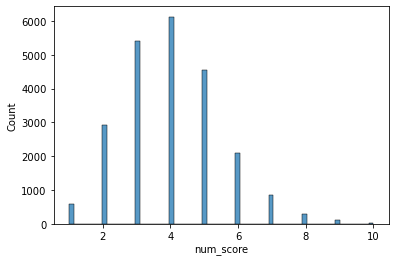

In [115]:
sns.histplot(men_num)

<AxesSubplot:xlabel='num_score', ylabel='Count'>

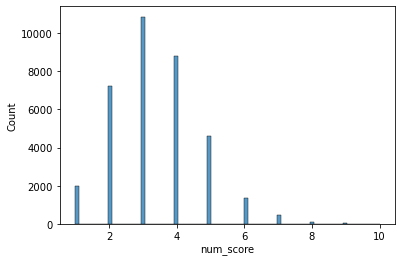

In [116]:
sns.histplot(women_num)

In [117]:
stats.levene(women_num, men_num)

LeveneResult(statistic=266.8820846283793, pvalue=7.372773333476368e-60)

In [118]:
men_num_duration = new[new.gender=="Male"].duration
women_num_duration = new[new.gender=="Female"].duration

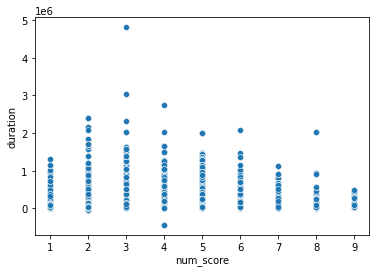

In [128]:
newv2_male = new[new["gender"] == "Male"]
newv2_female = new[new["gender"] == "Female"]

ax_men = sns.scatterplot(x="num_score", y="duration", data=newv2_male)

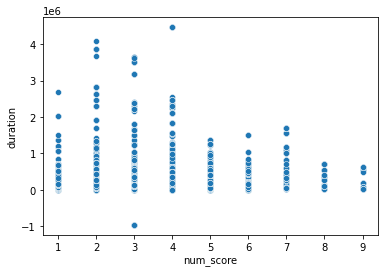

In [129]:
ax_women = sns.scatterplot(x="num_score", y="duration", data=newv2_female)

In [131]:
correlation_men = newv2_male.corr()
correlation_men

,Unnamed: 0_x,unid,working,Unnamed: 0_y,num_score,duration,financial_situation
Unnamed: 0_x,1.000000,0.014041,0.004569,0.999980,0.018372,-0.001566,-0.020086
unid,0.014041,1.000000,-0.052500,0.032202,0.061482,-0.104721,0.020179
working,0.004569,-0.052500,1.000000,0.006152,0.046046,0.161556,0.024537
Unnamed: 0_y,0.999980,0.032202,0.006152,1.000000,0.018292,-0.018283,-0.033658
num_score,0.018372,0.061482,0.046046,0.018292,1.000000,-0.036316,0.001583
duration,-0.001566,-0.104721,0.161556,-0.018283,-0.036316,1.000000,0.029731
financial_situation,-0.020086,0.020179,0.024537,-0.033658,0.001583,0.029731,1.000000


In [134]:
correlation_female = newv2_female.corr()

In [135]:
correlation_female

,Unnamed: 0_x,unid,working,Unnamed: 0_y,num_score,duration,financial_situation
Unnamed: 0_x,1.000000,0.008397,-0.015467,0.999980,0.016394,-0.006231,0.003935
unid,0.008397,1.000000,-0.021064,0.013200,0.041987,-0.136378,0.011592
working,-0.015467,-0.021064,1.000000,-0.023616,0.062045,0.175593,0.034372
Unnamed: 0_y,0.999980,0.013200,-0.023616,1.000000,0.016254,-0.013538,0.013817
num_score,0.016394,0.041987,0.062045,0.016254,1.000000,-0.010644,0.047978
duration,-0.006231,-0.136378,0.175593,-0.013538,-0.010644,1.000000,-0.000305
financial_situation,0.003935,0.011592,0.034372,0.013817,0.047978,-0.000305,1.000000


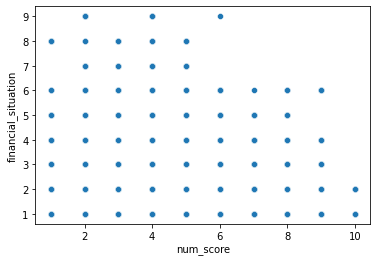

In [137]:
ax = sns.scatterplot(x="num_score", y="financial_situation", data=newv2_male)

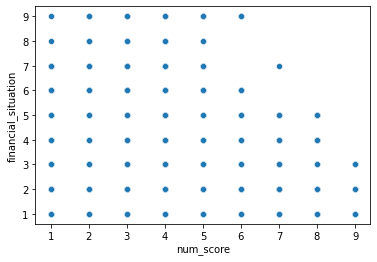

In [138]:
ax = sns.scatterplot(x="num_score", y="financial_situation", data=newv2_female)